In [13]:
import keras
keras.__version__

'2.13.1'

In [14]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Note: in this notebook we will be using the IMDB test set as our validation set. It doesn't matter in this context.

Let's prepare the data using the code from Chapter 3, Section 5:

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 [==============================] - 3s 0us/step


In [15]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [16]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 10s 198ms/step - loss: 0.5228 - acc: 0.8054 - val_loss: 0.3958 - val_acc: 0.8660
Epoch 2/20
49/49 [==============================] - 1s 30ms/step - loss: 0.3130 - acc: 0.8921 - val_loss: 0.2999 - val_acc: 0.8863
Epoch 3/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2389 - acc: 0.9140 - val_loss: 0.2782 - val_acc: 0.8881
Epoch 4/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2015 - acc: 0.9274 - val_loss: 0.2770 - val_acc: 0.8892
Epoch 5/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1757 - acc: 0.9374 - val_loss: 0.2868 - val_acc: 0.8864
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1588 - acc: 0.9441 - val_loss: 0.3037 - val_acc: 0.8812
Epoch 7/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1425 - acc: 0.9497 - val_loss: 0.3150 - val_acc: 0.8790
Epoch 8/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1299 -

In [21]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 10s 202ms/step - loss: 0.5811 - acc: 0.7340 - val_loss: 0.5124 - val_acc: 0.8110
Epoch 2/20
49/49 [==============================] - 1s 29ms/step - loss: 0.4376 - acc: 0.8791 - val_loss: 0.4115 - val_acc: 0.8734
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3314 - acc: 0.9102 - val_loss: 0.3360 - val_acc: 0.8833
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2579 - acc: 0.9232 - val_loss: 0.2991 - val_acc: 0.8883
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2147 - acc: 0.9341 - val_loss: 0.2843 - val_acc: 0.8888
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1880 - acc: 0.9404 - val_loss: 0.2845 - val_acc: 0.8852
Epoch 7/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1684 - acc: 0.9458 - val_loss: 0.2851 - val_acc: 0.8880
Epoch 8/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1542 -

In [22]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

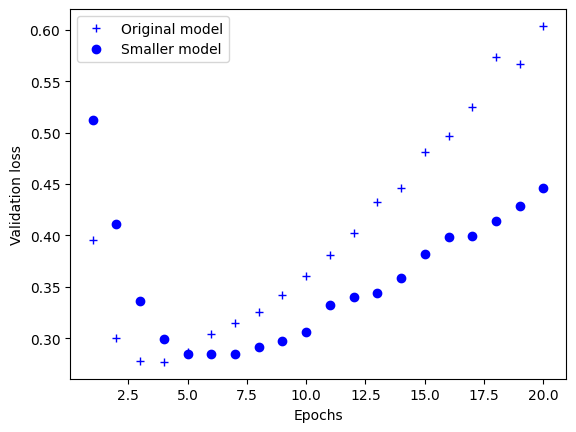

In [23]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [33]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [34]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 11s 211ms/step - loss: 0.5119 - acc: 0.8182 - val_loss: 0.4059 - val_acc: 0.8667
Epoch 2/20
49/49 [==============================] - 1s 30ms/step - loss: 0.3303 - acc: 0.9008 - val_loss: 0.3399 - val_acc: 0.8878
Epoch 3/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2802 - acc: 0.9172 - val_loss: 0.3398 - val_acc: 0.8846
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2578 - acc: 0.9244 - val_loss: 0.3322 - val_acc: 0.8882
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2418 - acc: 0.9313 - val_loss: 0.3399 - val_acc: 0.8856
Epoch 6/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2317 - acc: 0.9374 - val_loss: 0.3856 - val_acc: 0.8671
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2231 - acc: 0.9416 - val_loss: 0.4078 - val_acc: 0.8600
Epoch 8/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2199 -

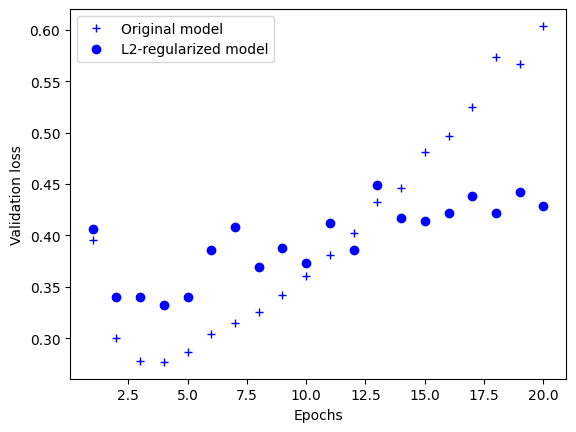

In [35]:
epochs = range(1, 21)
import matplotlib.pyplot as plt

original_val_loss = original_hist.history['val_loss']
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [71]:
from keras import regularizers
from keras import optimizers

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [72]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 11s 220ms/step - loss: 0.6402 - acc: 0.6624 - val_loss: 0.5608 - val_acc: 0.7886
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.5578 - acc: 0.7867 - val_loss: 0.4938 - val_acc: 0.8490
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.5083 - acc: 0.8266 - val_loss: 0.4526 - val_acc: 0.8711
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.4670 - acc: 0.8492 - val_loss: 0.4298 - val_acc: 0.8764
Epoch 5/20
49/49 [==============================] - 1s 28ms/step - loss: 0.4272 - acc: 0.8646 - val_loss: 0.4000 - val_acc: 0.8805
Epoch 6/20
49/49 [==============================] - 2s 35ms/step - loss: 0.3936 - acc: 0.8770 - val_loss: 0.3830 - val_acc: 0.8811
Epoch 7/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3696 - acc: 0.8821 - val_loss: 0.3742 - val_acc: 0.8809
Epoch 8/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3430 -

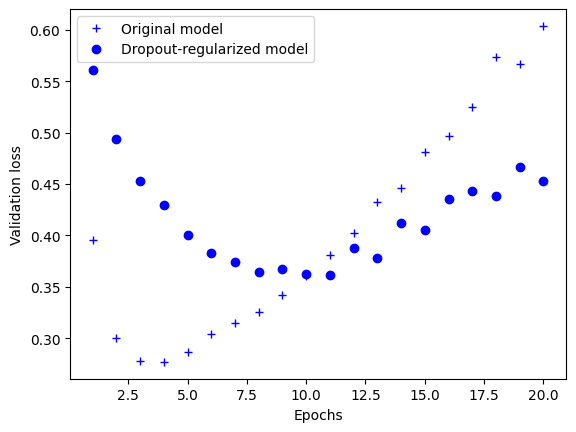

In [73]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

In [77]:
10.0//4

2.0